# Data Exploration of Wikipedia Web Traffic Forcasting

This notebook is meant to show a process for exploring time series data and what information and considerations should be looked at. The goal of this notebook is to document exploratory process and give a few baseline forcasts that we can compoare our deep learning model to.


In [1]:
#import packages
import matplotlib.pyplot as plt
import pandas as pd
import re

In [2]:
# read in the dataframe from the csv file
file = "/Volumes/SD.Card/ML_Data/Web Traffic/web-traffic-time-series-forecasting/train_1.csv"
data = pd.read_csv(file)
df = data.copy(deep=True)

In [3]:
df = df.fillna(0) # fill na just for our intial look
df.head(5)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
6,91Days_zh.wikipedia.org_all-access_spider,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,7.0,33.0,8.0,11.0,4.0,15.0,6.0,8.0,6.0
7,A'N'D_zh.wikipedia.org_all-access_spider,118.0,26.0,30.0,24.0,29.0,127.0,53.0,37.0,20.0,...,64.0,35.0,35.0,28.0,20.0,23.0,32.0,39.0,32.0,17.0
8,AKB48_zh.wikipedia.org_all-access_spider,5.0,23.0,14.0,12.0,9.0,9.0,35.0,15.0,14.0,...,34.0,105.0,72.0,36.0,33.0,30.0,36.0,38.0,31.0,97.0
9,ASCII_zh.wikipedia.org_all-access_spider,6.0,3.0,5.0,12.0,6.0,5.0,4.0,13.0,9.0,...,25.0,17.0,22.0,29.0,30.0,29.0,35.0,44.0,26.0,41.0


### Lets take a look at the number of views for each language.
Count the number of page views for each language by grouping each page by the two character language idenitfier

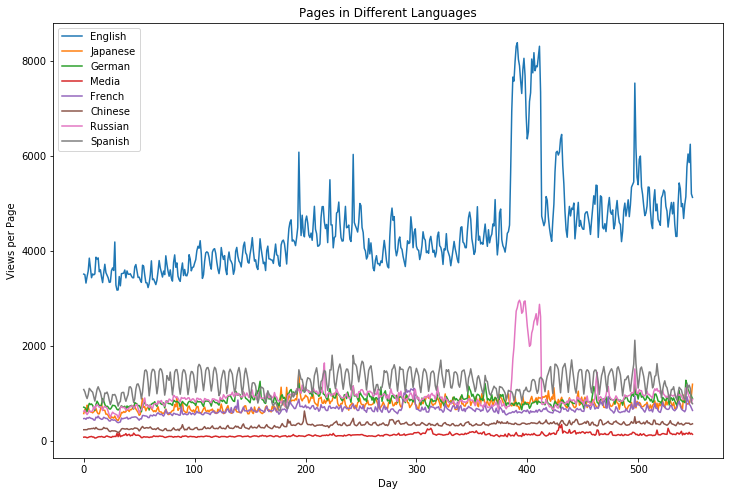

In [4]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

df['lang'] = df.Page.map(get_language)

lang_sets = {}
for language in ['en','ja','de','na','fr','zh','ru','es']:
    lang_sets[language] = df[df.lang==language].iloc[:,0:-1]

sums = {}
for key in lang_sets:
    sums[key] = lang_sets[key].iloc[:,1:].sum(axis=0) / lang_sets[key].shape[0]
    
days = [r for r in range(sums['en'].shape[0])]

fig = plt.figure(1,figsize=[12,8])
plt.ylabel('Views per Page')
plt.xlabel('Day')
plt.title('Pages in Different Languages')
labels={'en':'English','ja':'Japanese','de':'German','na':'Media','fr':'French','zh':'Chinese','ru':'Russian','es':'Spanish'}

for key in sums:
    plt.plot(days,sums[key],label = labels[key] )

plt.legend()
plt.show()

### Let's look at the type of the number of pages in each language, which devices people are access wikipedia from, and the type of agent acessing the pages. All of this data is located in the page of each row.

In [5]:
page_details = pd.DataFrame([i.split("_")[-3:] for i in df["Page"]])
page_details.columns = ["project", "access", "agent"]
page_details.describe()

,project,access,agent
count,145063,145063,145063
unique,9,3,2
top,en.wikipedia.org,all-access,all-agents
freq,24108,74315,110150


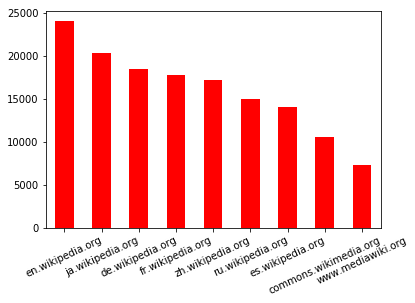

In [6]:
page_details.project.value_counts().plot(kind='bar', colormap = 'autumn', rot = 25)

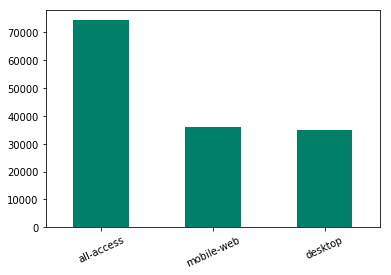

In [7]:
page_details.access.value_counts().plot(kind='bar', colormap = 'summer', rot = 25)

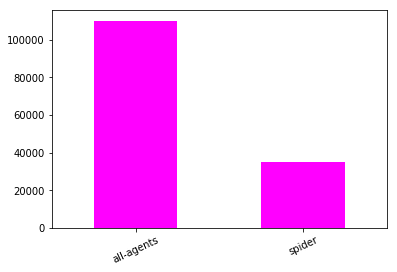

In [8]:
page_details.agent.value_counts().plot(kind='bar',colormap='spring', rot = 25)

### Finally, lets just plot a few random rows to see what our data looks like

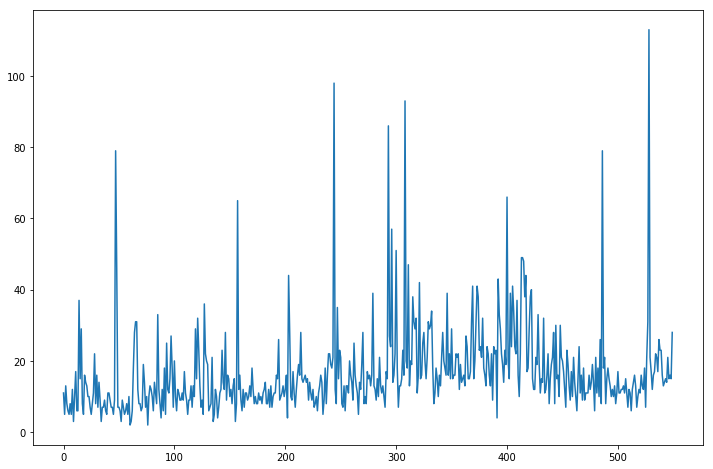

In [9]:
plt.figure(figsize=(12,8))
plt.plot(df[25:26].values[0][1:-1])

We will look more into the statistic of each time series in the baseline prediction notebook